<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [82]:
# Read CSV
house_csv = pd.read_csv("../../../DATA/Sacramento_transactions.csv")
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [83]:
house_csv.shape

(985, 12)

In [84]:
house_csv.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [85]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [86]:
#ZIP is categorical, not int. this needs to be amended to a string
house_csv['zip']=house_csv['zip'].astype(str)

In [87]:
house_csv.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [88]:
# note the zeros in the minumum - not possible in terms of no. beds/baths, and sq.ft ect.
# these will result in outliers
# WHEN DOING LINEAR REGESSION DROP THE OUTLIERS

In [89]:
# checking for nulls
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

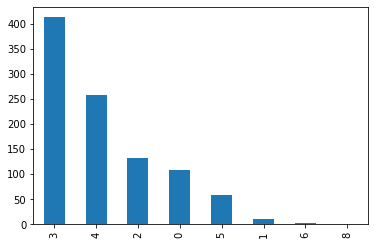

In [90]:
# Number of beds - count
house_csv['beds'].value_counts().plot(kind='bar')
# again, not the 0's. Remove!

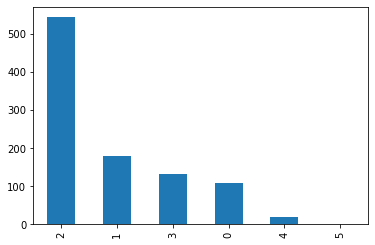

In [91]:
# Number of baths - count
house_csv['baths'].value_counts().plot(kind='bar')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [92]:
# ANSWER
# 'price' is the target variable (y) as it is the continuous dependent that we are trying to predict using other input (Predictor?) variables

(array([ 96., 269., 304., 160.,  76.,  43.,  22.,  10.,   1.,   4.]),
 array([  1551. ,  89874.9, 178198.8, 266522.7, 354846.6, 443170.5,
        531494.4, 619818.3, 708142.2, 796466.1, 884790. ]),
 <a list of 10 Patch objects>)

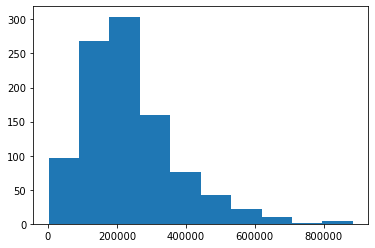

In [93]:
plt.hist(house_csv['price'])

In [94]:
# note: can detect
    # a slight deviation from a normal distribution 
    # a positive (right) skewness

#### 2.2 List all possible variables which might be Predictor variable.

In [95]:
# ANSWER
# (x) ZIP code, no. beds, no. baths, sq.feet, type (residential ect.)

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [96]:
# ANSWER
house_corr_matrix = house_csv.corr()
house_corr_matrix

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [97]:
import seaborn as sns

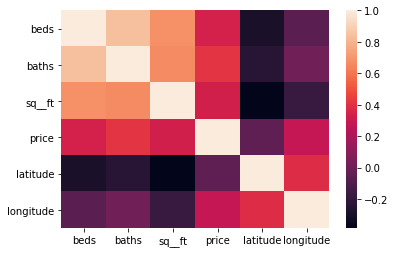

In [98]:
sns.heatmap(house_corr_matrix)

In [99]:
# Where +/- 1 is correlated, and 0 represents no relation.
# the no. baths has the highest correlation to price (0.42), followed closely by no.beds (0.34) and then sq ft (0.33).
# although it has the third highest correlation, I will use sq ft as my predictor variable (X) as it is deemed more logical

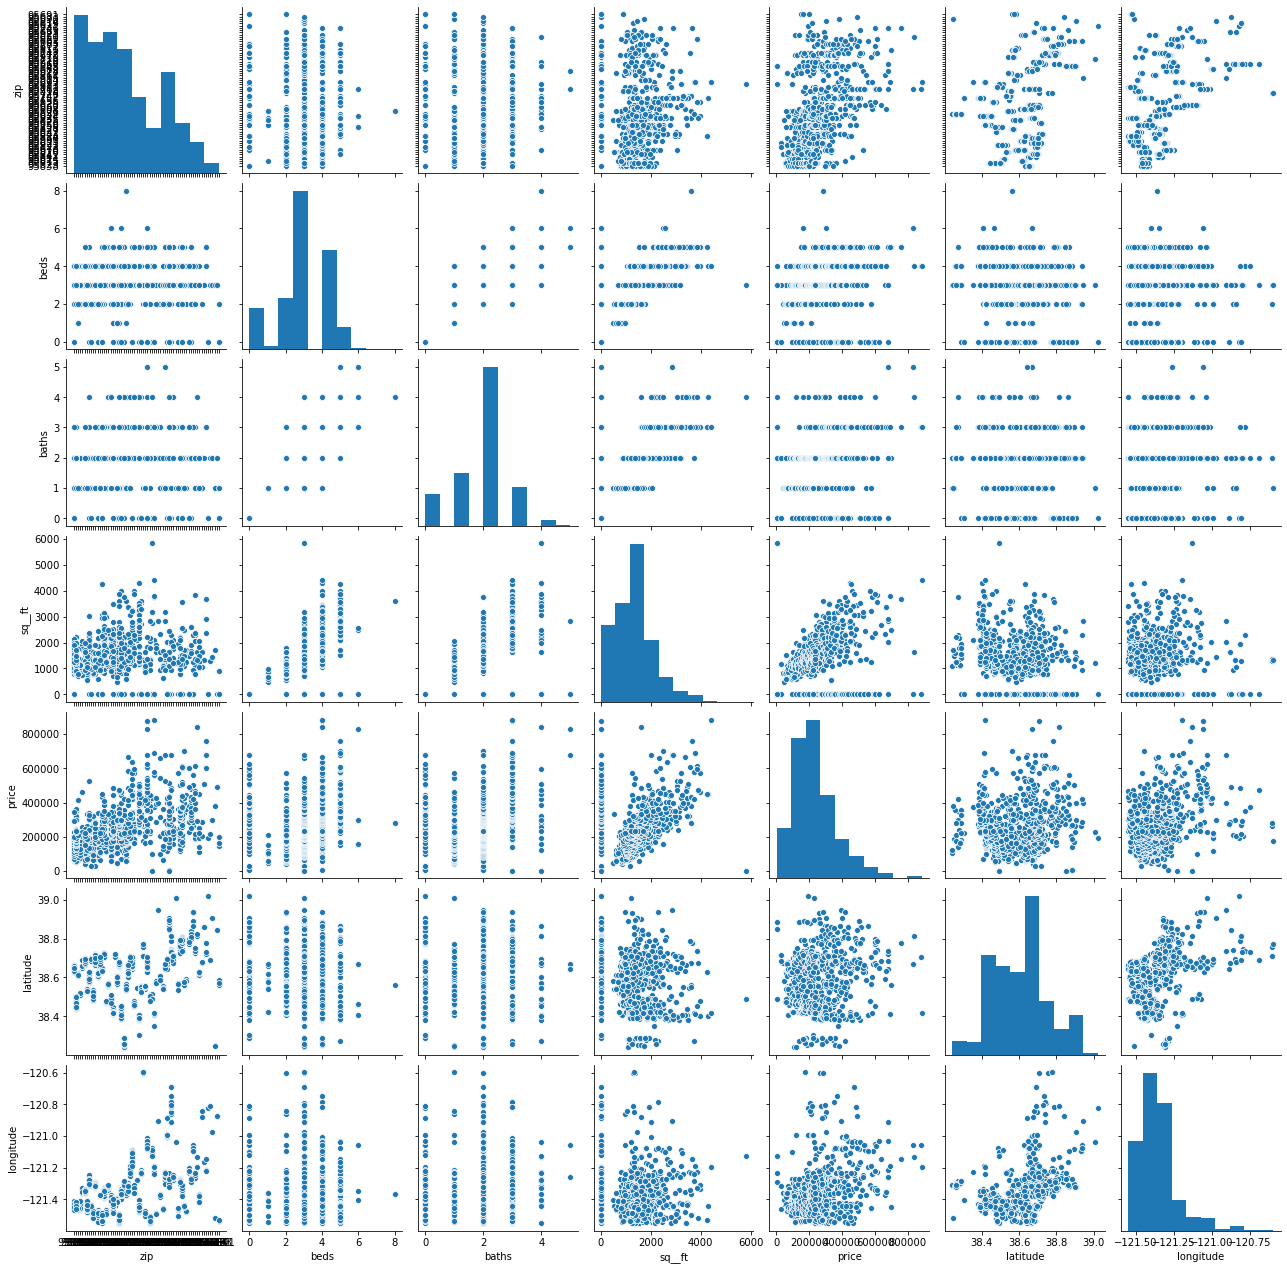

In [100]:
sns.pairplot(house_csv)

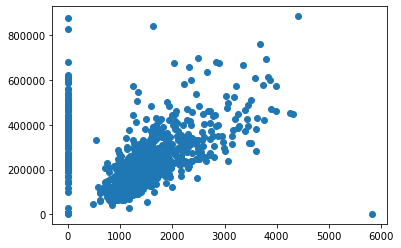

In [101]:
plt.scatter(house_csv['sq__ft'],house_csv['price'])

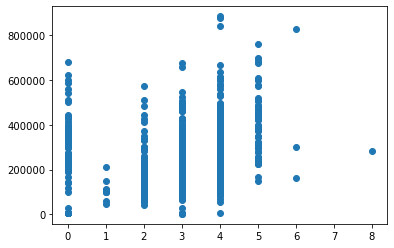

In [102]:
plt.scatter(house_csv['beds'],house_csv['price'])

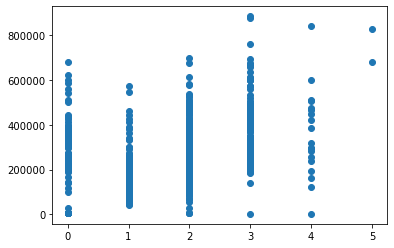

In [103]:
plt.scatter(house_csv['baths'],house_csv['price'])

In [117]:
#removing (dropping! not replacing) the outliers "0" sq ft, beds or baths.
#using pandas.dataframe.drop
house_csv_amend1 = house_csv.drop(house_csv[house_csv['sq__ft'or'beds'or'baths']==0].index)
#another method
house_csv_amend2 = house_csv[house_csv['sq__ft'or'beds'or'baths']>0]

In [118]:
# now see the correlations of the amended dataframe
house_csv_amend1.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


In [ ]:
#Notice the huge improvement in correlation for beds,baths and sq ft.

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [131]:
# ANSWER
# Linear regression? But that is below
# "poly fit"?
# mean could be easiest

In [132]:
# Try mean of predictor variable (price)
Ymean = house_csv_amend1['price'].mean()
Y = house_csv_amend1['price']
X = house_csv_amend1['sq__ft']

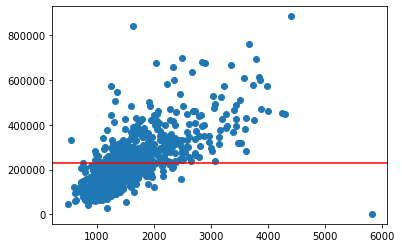

In [133]:
plt.scatter(X,Y)
plt.axhline(Ymean, color='r')

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [134]:
# ANSWER
# residual = difference between price and predicted price
residual = (house_csv_amend1['price']-Ymean).mean()
residual

8.180536128379204e-11

In [127]:
# this looks incorrect - check answers. 

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [135]:
# ANSWER
X = house_csv_amend1['sq__ft']
Y = house_csv_amend1['price']

#NOTE: yhat = residual, ybar = mean

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [146]:
# ANSWER
def cal_beta1(X,Y):
   
    Xbar = X.mean()
    Ybar = Y.mean()
    a = np.sum((Y-Ybar)*(X-Xbar))
    b = np.sum((X-Xbar)**2)
    
    beta1 = a/b
    
    return beta1

In [147]:
beta1 = cal_beta1(X,Y)
beta1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [148]:
# ANSWER
def cal_beta0(X,Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta0 = Ybar - cal_beta1(X,Y)*Xbar
    
    return beta0

In [149]:
beta0 = cal_beta0(X,Y)
beta0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [153]:
# ANSWER
def cal_yhat(x, b0, b1):
    return b0+b1*x

In [154]:
Yhat = cal_yhat(X, beta0, beta1)
Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [155]:
# ANSWER
def cal_residual(Y, Yhat):
    residual = Y-Yhat
    return residual

In [156]:
residual = cal_residual(Y,Yhat)
residual #Check with Bryce - does this need to be absolute?

0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [0]:
# ANSWER

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [160]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [0]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [158]:
# ANSWER (using sq ft)
predicted_x = 1204

In [159]:
# Yhat(predicted) = beta0 + beta1*predictedx (𝑦̂=𝛽0+𝛽1𝑥)
predicted_y = beta0 + beta1 * predicted_x
predicted_y

180971.28382945186



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



